#Introduction

Kijiji.ca is one of the most popular car sales website in Canada. Car owners and dealers sell their used car or new car while buyers seek their dream car in this market. <br>
In this project, I am going to explore the data and build models to predict car price.

In [2]:
# Data source
# https://www.kaggle.com/datasets/hossaingh/kijiji-car-sales-ads

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot') # use style ggplot
pd.set_option('display.max_columns', 200) # expand df columns

In [5]:
# Import data
df = pd.read_csv('/content/gdrive/My Drive/Dataset/Python/car_AdData.csv')

#Data Examination

In [6]:
# To see the dimension of data
df.shape

(51343, 28)

In [7]:
# To see the how the data looks like
df.head()

,AdID,city,latitude,longitude,mapAddress,title,price,saleby,make,model,Trim,year,condition,Kilometers,body,Drivetrain,fueltype,color,Date,visit,No of door,No of seats,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
0,1623070279,Burnaby/New Westminster,NaN,NaN,NaN,Suzuki Jimny 2006,14999,owner,Suzuki,other,NaN,2006,used,37600,wagon,4x4,gas,black,"06/27/2022, 20:16:56",NaN,3,4,1.0,NaN,NaN,NaN,NaN,NaN
1,1623097429,Delta/Surrey/Langley,NaN,NaN,NaN,Mustang cobra 99,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,rwd,NaN,black,"06/28/2022, 03:02:22",2026.0,2,4,1.0,NaN,NaN,NaN,NaN,NaN
2,1595531267,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Nissan Frontier SE 4X4 - Local BC | No Ac...,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,4x4,gas,black,"06/28/2022, 22:53:29",795.0,4,5,2.0,NaN,NaN,NaN,1.0,NaN
3,1623215000,Delta/Surrey/Langley,NaN,NaN,NaN,1985 Chevy 1500,3300,owner,Chevrolet,ck_pickup_1500,NaN,1985,used,180000,pickup_truck,4x4,gas,blue,"06/29/2022, 10:30:00",1020.0,4,5,2.0,NaN,NaN,NaN,NaN,NaN
4,1623286366,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Volkswagen Jetta TDI,2700,owner,volkswagen,jetta,NaN,2006,used,307000,sedan,fwd,diesel,silver,"06/29/2022, 14:28:28",1396.0,4,5,1.0,NaN,NaN,NaN,NaN,NaN


There are 28 columns in the raw dataset.

Column name | Content | Additional info / Example | Data type
--- | --- | --- | ---
AdID | Advertisement ID | --- | Categorical
City | City name | --- | Categorical
Latitude | Latitude of city | Removed | ---
Longitude | Longitude of city | Removed | ---
MapAddress | Address of the seller | Removed | ---
Title | Title of the ad | --- | Categorical
Price | Price of the car | --- | Numerical
Saleby | Sale by owner or dealer | --- | Categorical
Make | Manufacturer of the car | --- | Categorical
Model | Model of the car | --- | Categorical
Trim | Version of the car | --- | Categorical
Year | Year made of the car | --- | Categorical
Condition | Condition of the car | new, used, damaged, salvage or lease takeover  | Categorical
Kilometers | Kilometer run of the car | --- | Numerical
Body | Body type of the car | sedan, pickup truck, SUV... | Categorical
Drivetrain | The transmission to the drive axles | AWD, RWD, FWD | Categorical
Fueltype | Fuel used of the car | --- | Categorical
Color | Color of the car | --- | Categorical
Date | Date of the ad posted | --- | Categorical
Visit | Number of people visited the ad | --- | Numerical
No of door | Number of door of the car | --- | Categorical
No of seats | Number of seat of the car | --- | Categorical
Transmission | Number of gear | 0 - 3 | Categorical
Push button start | Has push button start feature? | 1 for yes, 0 for no | categorical
Parking assist | Has parking assist feature? | 1 for yes, 0 for no | Categorical
Sunroof | Has sunroof? | 1 for yes, 0 for no | Categorical
Alloy wheels | Are the wheels alloy wheels? | 1 for yes, 0 for no | Categorical
VIN | Vehicle identification number | Removed | ---

In [8]:
# Column names of data
df.columns

Index(['AdID', 'city', 'latitude', 'longitude', 'mapAddress', 'title', 'price',
       'saleby', 'make', 'model', 'Trim', 'year', 'condition', 'Kilometers',
       'body', 'Drivetrain', 'fueltype', 'color', 'Date', 'visit',
       'No of door', 'No of seats', 'Transmission', 'push button start',
       'parking assist', 'sunroof', 'alloy wheels', 'VIN'],
      dtype='object')

In [9]:
# Data types for each column
df.dtypes
# data.info()

AdID                  object
city                  object
latitude             float64
longitude            float64
mapAddress           float64
title                 object
price                  int64
saleby                object
make                  object
model                 object
Trim                  object
year                   int64
condition             object
Kilometers             int64
body                  object
Drivetrain            object
fueltype              object
color                 object
Date                  object
visit                float64
No of door            object
No of seats           object
Transmission         float64
push button start    float64
parking assist       float64
sunroof              float64
alloy wheels         float64
VIN                  float64
dtype: object

In [10]:
# Brief statistical information of numerical columns
df.describe()

,latitude,longitude,mapAddress,price,year,Kilometers,visit,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
count,0.0,0.0,0.0,5.134300e+04,51343.000000,5.134300e+04,50541.000000,47339.000000,17088.000000,12068.000000,11710.000000,18601.000000,0.0
mean,NaN,NaN,NaN,3.719879e+04,2015.561459,9.773170e+04,294.065333,1.929994,0.991983,0.989228,0.991119,0.996237,NaN
std,NaN,NaN,NaN,4.422589e+05,6.877405,1.400040e+05,858.379622,0.295730,0.089182,0.103233,0.093825,0.061231,NaN
min,NaN,NaN,NaN,0.000000e+00,1900.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,1.357000e+04,2013.000000,1.516850e+04,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,2.929500e+04,2017.000000,7.594700e+04,75.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,4.999500e+04,2021.000000,1.500000e+05,261.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
max,NaN,NaN,NaN,1.000000e+08,2023.000000,9.999999e+06,54064.000000,3.000000,1.000000,1.000000,1.000000,1.000000,NaN


#Data Cleaning

In [11]:
# Column names of data
df.columns

Index(['AdID', 'city', 'latitude', 'longitude', 'mapAddress', 'title', 'price',
       'saleby', 'make', 'model', 'Trim', 'year', 'condition', 'Kilometers',
       'body', 'Drivetrain', 'fueltype', 'color', 'Date', 'visit',
       'No of door', 'No of seats', 'Transmission', 'push button start',
       'parking assist', 'sunroof', 'alloy wheels', 'VIN'],
      dtype='object')

In [12]:
# To remove some of the columns with no information
df = df[[
    'AdID',
      'city',
      # 'latitude',  # data removed due to privacy
      # 'longitude', # data removed due to privacy
      # 'mapAddress', # data removed due to privacy
      # 'title', # info has separated to year, make, model
      'price',
       'saleby',
      'make',
      'model',
      'Trim',
      'year',
      'condition',
      'Kilometers',
       'body',
      'Drivetrain',
      'fueltype',
      'color',
      'Date',
      'visit',
       'No of door',
      'No of seats',
      'Transmission',
      'push button start',
       'parking assist',
      'sunroof',
      'alloy wheels'
      # ,'VIN' # data removed due to privacy
      ]].copy()

In [13]:
# Check data type
df.dtypes

AdID                  object
city                  object
price                  int64
saleby                object
make                  object
model                 object
Trim                  object
year                   int64
condition             object
Kilometers             int64
body                  object
Drivetrain            object
fueltype              object
color                 object
Date                  object
visit                float64
No of door            object
No of seats           object
Transmission         float64
push button start    float64
parking assist       float64
sunroof              float64
alloy wheels         float64
dtype: object

In [14]:
# Convert date to correct data type
df.Date=pd.to_datetime(df.Date)

In [15]:
# Rename columns
df=df.rename(columns={'saleby':'sale_by',
                      'Trim':'trim',
                      'Kilometers':'kilometers',
                      'Transmission':'transmission',
                      'year':'year_made',
                      'Drivetrain':'drive_train',
                      'fueltype':'fuel_type',
                      'Date':'date_posted',
                      'visit':'no_of_visit',
                      'No of door':'no_of_door',
                      'No of seats':'no_of_seats',
                      'push button start':'push_button_start',
                      'parking assist':'parking_assist',
                      'sunroof':'sunroof',
                      'alloy wheels':'alloy_wheels'})

In [16]:
# Find duplicated value
df.loc[df.duplicated()]

,AdID,city,price,sale_by,make,model,trim,year_made,condition,kilometers,body,drive_train,fuel_type,color,date_posted,no_of_visit,no_of_door,no_of_seats,transmission,push_button_start,parking_assist,sunroof,alloy_wheels
7733,m4320099,North Shore,57430,dealer,Chrysler,pacifica,TOURING All-wheel Drive,2022,new,0,minivan_van,awd,gas,black,2022-07-19 15:25:48,6.0,4,7,2.0,NaN,NaN,NaN,NaN


In [17]:
# Remove duplicated
df=df.loc[~df.duplicated()]\
    .reset_index(drop=True).copy()

In [18]:
# Filling missing values of columns
df['trim']=df['trim'].fillna('Other') # put missing value in drive train to other
df['drive_train']=df['drive_train'].fillna('other') # put missing value in drive train to other
df['fuel_type']=df['fuel_type'].fillna('other') # put missing value in drive train to other
df['color']=df['color'].fillna('other') # put missing value in color to other
df['no_of_door']=df['no_of_door'].fillna('others') # put missing value in no of door to other
df['no_of_seats']=df['no_of_seats'].fillna('other') # put missing value in no of door to other
df['no_of_visit']=df['no_of_visit'].fillna(0) # put missing value in No_of_Visit to 0
df=df.dropna(subset='transmission').reset_index(drop=True).copy() # drop rows with na in Transmission
df[['push_button_start', 'parking_assist', 'sunroof', 'alloy_wheels']]=\
df[['push_button_start', 'parking_assist', 'sunroof', 'alloy_wheels']].fillna(0) # fill 0 for missing value in Push_Button_Start, Parking_Assist, Sunroof, Alloy_Wheels'mission

In [19]:
# Change model count < 50 to "other"
model_cnt=df['model'].value_counts()
df['model']=df['model'].replace(model_cnt[model_cnt.values <50].index, 'other')

In [20]:
# Change trim count < 50 to "Other"
trim_cnt=df['trim'].value_counts()
df['trim']=df['trim'].replace(trim_cnt[trim_cnt.values <50].index, 'Other')

In [21]:
df['trim'].value_counts()

Other        31674
SE             810
Limited        757
Sport          747
XLT            714
             ...  
Tradesman       53
RX 350          53
ES              52
RS              50
XDrive35i       50
Name: trim, Length: 89, dtype: int64

In [22]:
# Find missing value
df.isna().sum()

AdID                 0
city                 0
price                0
sale_by              0
make                 0
model                0
trim                 0
year_made            0
condition            0
kilometers           0
body                 0
drive_train          0
fuel_type            0
color                0
date_posted          0
no_of_visit          0
no_of_door           0
no_of_seats          0
transmission         0
push_button_start    0
parking_assist       0
sunroof              0
alloy_wheels         0
dtype: int64

# Feature Engineering

In [23]:
# To create new feature car age = current year - car_made
df['car_age']=dt.datetime.now().year-df['year_made']
df=df.drop('year_made',axis=1)

#Exploratory Data Analysis

## City

<Axes: title={'center': 'Car Sales by City'}>

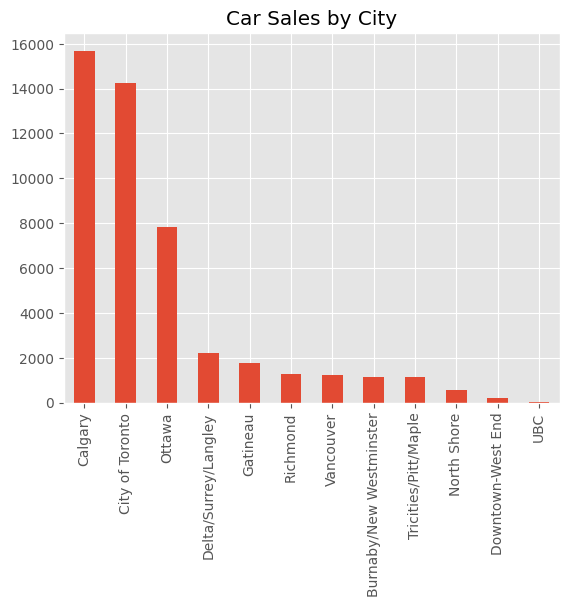

In [24]:
df['city'].value_counts().plot(kind='bar', title='Car Sales by City')

## Price

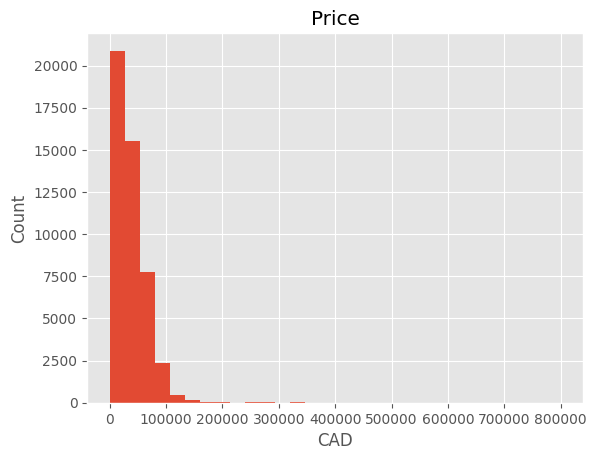

In [25]:
# Find out the distribution of the price
ax=df['price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

In [26]:
# A function is defined to remove outlier if it is outside 1.5 IQR
def remove_outlier(df, columns):
  ''' The function remove outlier if value outside 1.5 IQR

      input: df = dataframe, columns = list of column name
      output: df = dataframe with outlier removed
  '''
  for col in columns:
    perc25=np.percentile(df[col].dropna(),25)
    perc75=np.percentile(df[col].dropna(),75)
    iqr=perc75-perc25
    upper=perc75+1.5*iqr
    lower=perc25-1.5*iqr
    df=df[df[col].between(lower,upper)]

  return df.reset_index(drop=True).copy()

In [27]:
# Remove outlier
df=remove_outlier(df,['price'])

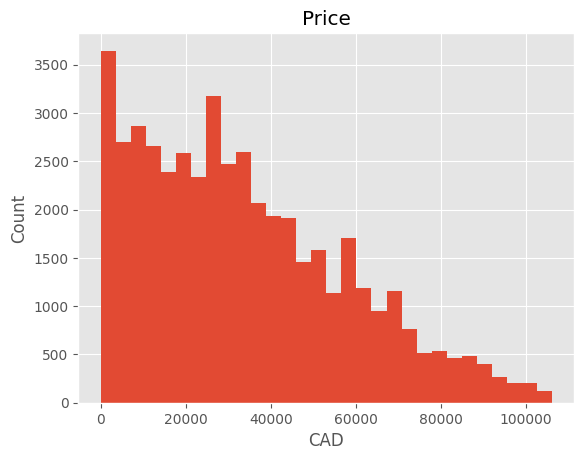

In [28]:
# Find out the distribution of the price
ax=df['price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

In [29]:
# Since $0 for a car is impossible, we drop data which the price < 5 percentile
perc_5=np.percentile(df['price'],5)
df=df.query('price > @perc_5').reset_index(drop=True).copy()

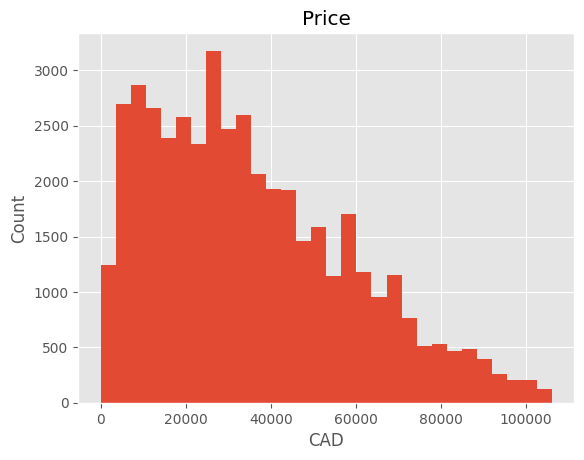

In [30]:
# price histogram again
ax=df['price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

From above, the overall price of used car is around $30,000

## Sales By

In [31]:
df['sale_by'].value_counts().index

Index(['dealer', 'owner'], dtype='object')

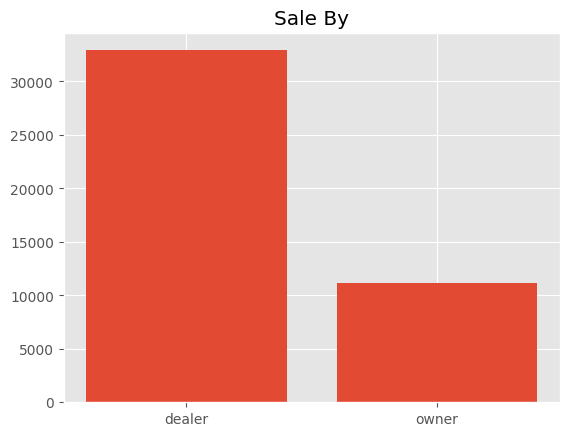

In [32]:
plt.bar(df['sale_by'].value_counts().index, df['sale_by'].value_counts().values)
plt.title('Sale By')
plt.show()

## Make

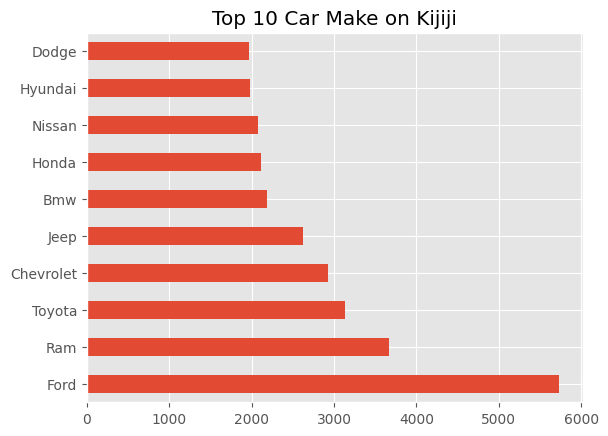

In [33]:
df['make'].value_counts().head(10).plot(kind='barh', title='Top 10 Car Make on Kijiji')
plt.show()

## Car Age

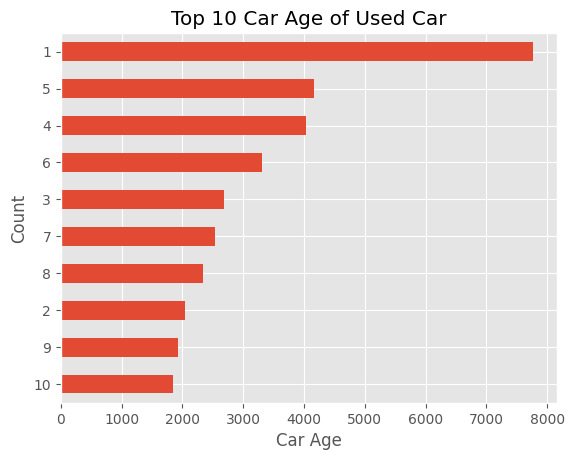

In [34]:
# Find out what is the car_age of most of the used car on sales
ax = df['car_age'].value_counts()\
  .head(10)\
  .plot(kind='barh', title="Top 10 Car Age of Used Car")

ax.set_xlabel('Car Age')
ax.set_ylabel('Count')

plt.gca().invert_yaxis()

plt.show()

# By the plot, we can see most of the used cars on sales are very new

## Condition

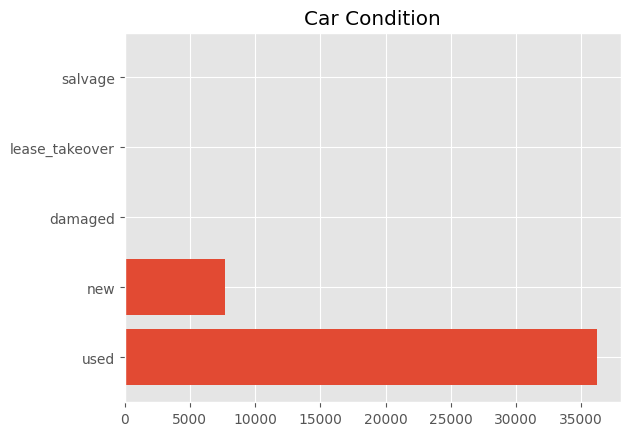

In [35]:
fig, ax=plt.subplots()

ax.barh(df['condition'].value_counts().index, df['condition'].value_counts().values)

ax.set_title('Car Condition')

plt.show()

## Kilometer Used

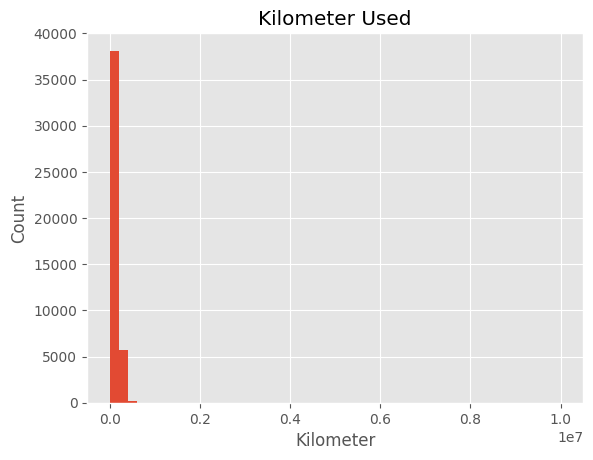

In [36]:
# Find out the distribution of the kilometer used
ax=df['kilometers'].plot(kind='hist',
                      title='Kilometer Used',
                      bins=50)
ax.set_xlabel('Kilometer')
ax.set_ylabel('Count')
plt.show()

In [37]:
# Remove outlier
df=remove_outlier(df,['kilometers'])

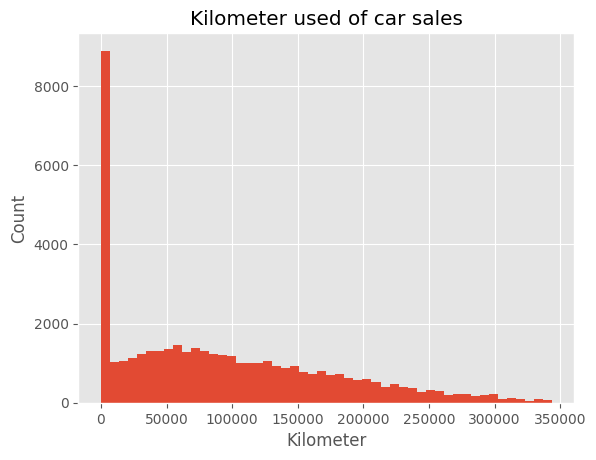

In [38]:
# Kilometer used distribution
ax=df['kilometers'].plot(kind='hist',
                      title='Kilometer used of car sales',
                      bins=50)
ax.set_xlabel('Kilometer')
ax.set_ylabel('Count')
plt.show()

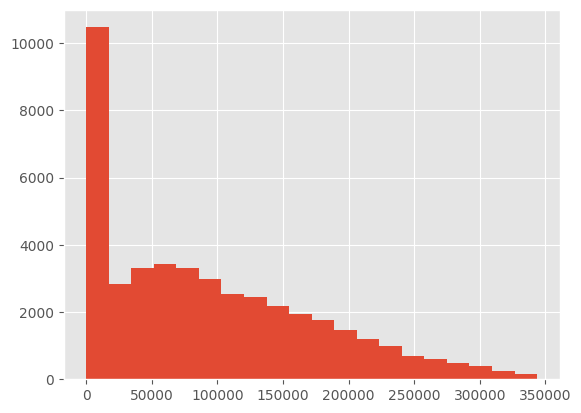

In [39]:
fig, ax=plt.subplots()

ax.hist(df['kilometers'], bins=20)

plt.show()

The histogram shows most of the car on sales are new.<br>
Other than that, most of the owner will sell their car when it reach 50,000 km

## Body

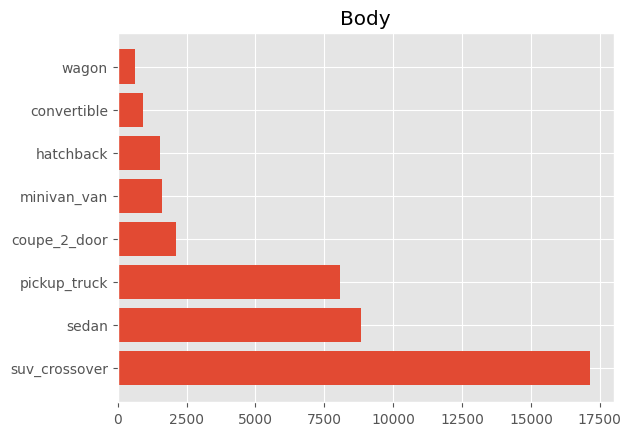

In [40]:
data=df['body'].value_counts().drop('other')

fig, ax= plt.subplots()

ax.barh(data.index, data.values)

ax.set_title('Body')

# plt.xticks(rotation=45)
plt.show()

## Drive Train

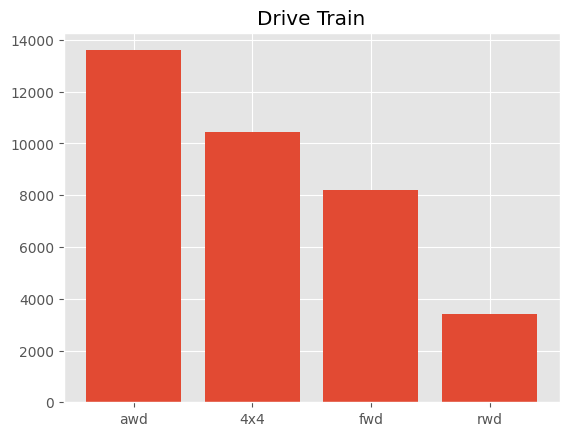

In [41]:
data=df['drive_train'].value_counts().drop('other')

fig, ax= plt.subplots()

ax.bar(data.index, data.values)

ax.set_title('Drive Train')

plt.show()

## Fuel Type

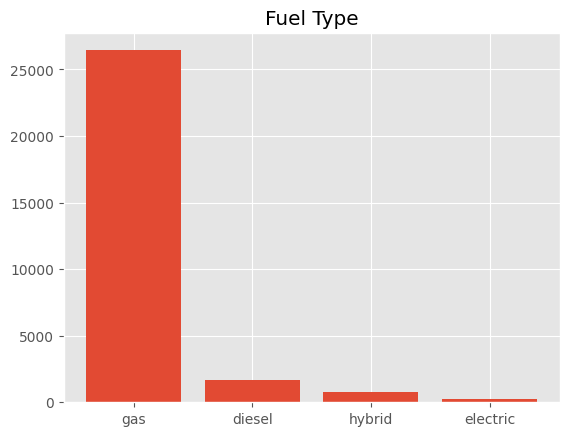

In [42]:
data=df['fuel_type'].value_counts().drop('other')

fig, ax= plt.subplots()

ax.bar(data.index, data.values)

ax.set_title('Fuel Type')

plt.show()

## Color

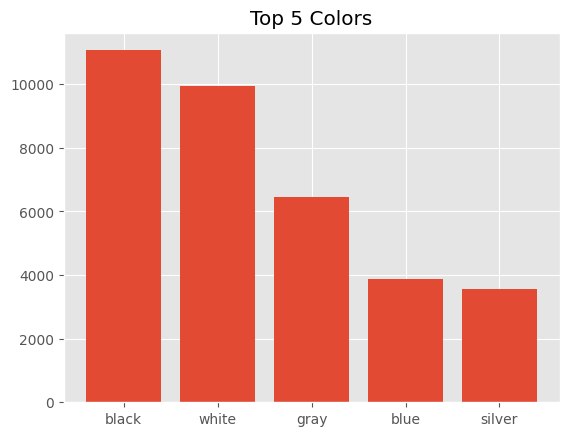

In [43]:
data=df['color'].value_counts().drop('other').head(5)

fig, ax= plt.subplots()

ax.bar(data.index, data.values)

ax.set_title('Top 5 Colors')

plt.show()

## Date Posted

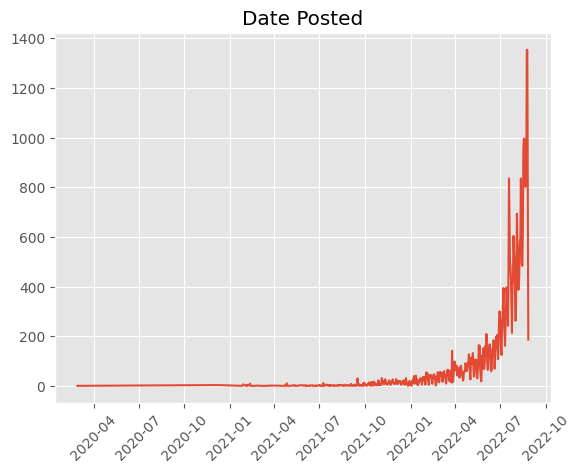

In [44]:
data=df['date_posted'].dt.date.value_counts().sort_index()

fig, ax= plt.subplots()

ax.plot(data.index, data.values)

ax.set_title('Date Posted')

plt.xticks(rotation=45)

plt.show()

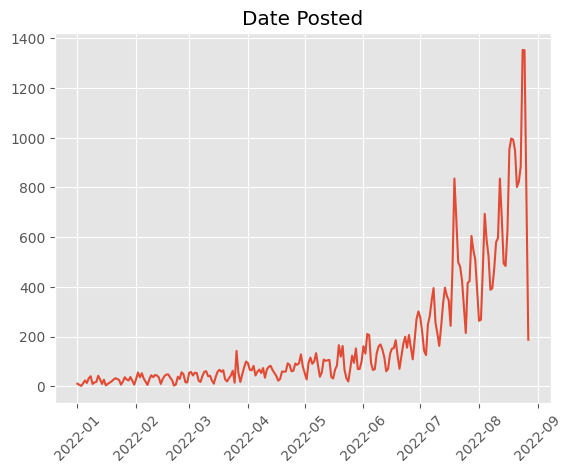

In [45]:
# Focus on 2022
filt=(df['date_posted'].dt.year == 2022)
data=df[filt]['date_posted'].dt.date.value_counts().sort_index()

fig, ax= plt.subplots()

ax.plot(data.index, data.values)

ax.set_title('Date Posted')

plt.xticks(rotation=45)

plt.show()

## Number of Visit

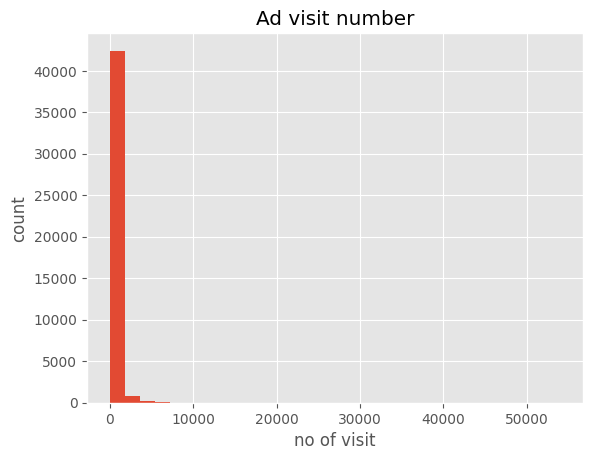

In [46]:
# Find out the distribution of the visit number
ax = df['no_of_visit'].plot(kind='hist',
                             title="Ad visit number", bins=30)
ax.set_xlabel('no of visit')
ax.set_ylabel('count')
plt.show()

From above histograms, we found there are many outliers in every feature

In [47]:
# Remove outlier
df=remove_outlier(df,['no_of_visit'])

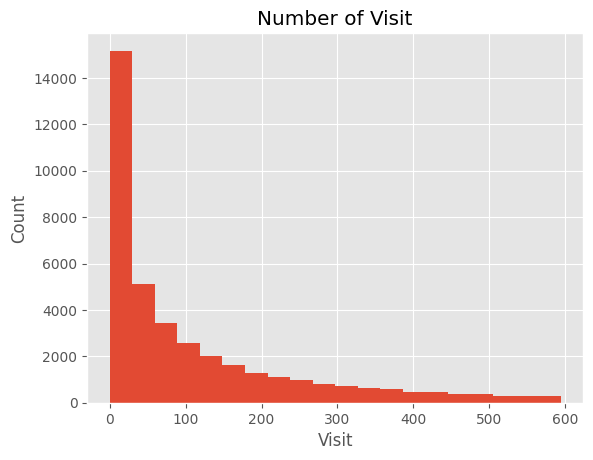

In [48]:
fig, ax=plt.subplots()

ax.hist(df['no_of_visit'], bins=20)

ax.set_title('Number of Visit')
ax.set_xlabel('Visit')
ax.set_ylabel('Count')

plt.show()

From above, we can see most of the ads have not been visited

## Car Features

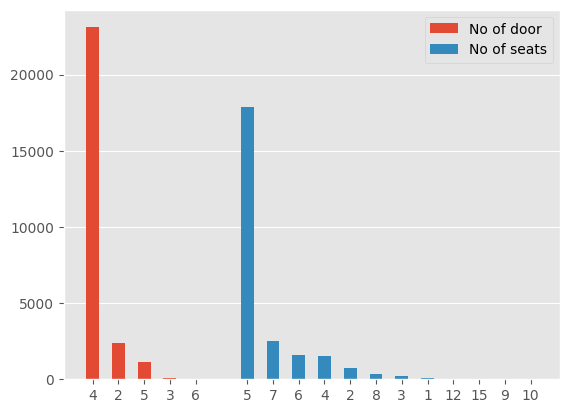

In [49]:
data1=df['no_of_door'].value_counts().drop('others')
data2=df['no_of_seats'].value_counts().drop('other')

bar_width=.5
bar_pos1=np.arange(len(data1))
bar_pos2=max(bar_pos1)+np.arange(len(data2))+2

fig, ax=plt.subplots()

ax.bar(bar_pos1, data1, width=bar_width, label='No of door')
ax.bar(bar_pos2, data2, width=bar_width, label='No of seats')

plt.xticks(np.append(bar_pos1, bar_pos2) , data1.index.append(data2.index))
plt.legend()
plt.grid(False, axis='x')
plt.show()

## Transmission

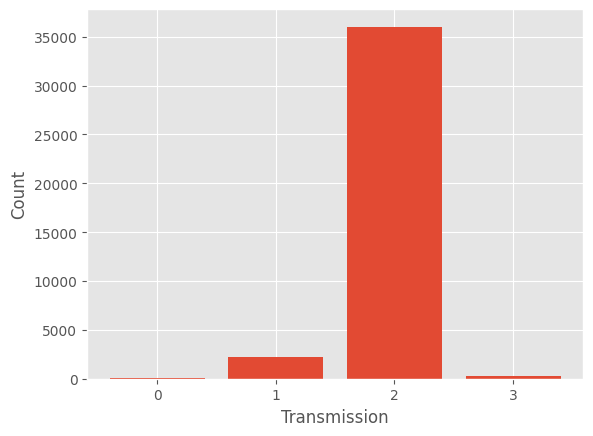

In [50]:
data=df['transmission'].value_counts()

fig, ax=plt.subplots()

ax.bar(data.index, data.values)

plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(data.index)
plt.show()

## Car Functions

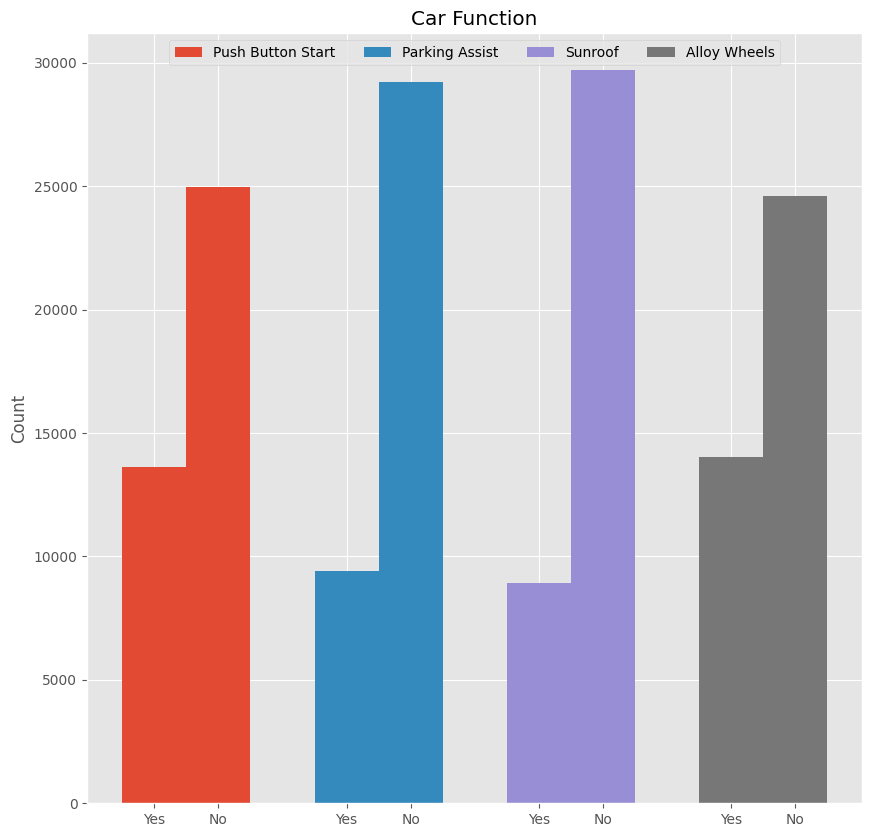

In [51]:
data1=df['push_button_start'].value_counts().sort_index(ascending=False)
data2=df['parking_assist'].value_counts().sort_index(ascending=False)
data3=df['sunroof'].value_counts().sort_index(ascending=False)
data4=df['alloy_wheels'].value_counts().sort_index(ascending=False)

fig, ax=plt.subplots(figsize=(10,10))

bar_width=.5
bar_pos1=np.arange(1,step=.5)
bar_pos2=bar_pos1+max(bar_pos1)+1
bar_pos3=bar_pos1+max(bar_pos2)+1
bar_pos4=bar_pos1+max(bar_pos3)+1

ax.bar(bar_pos1, data1, width=bar_width, label='Push Button Start')
ax.bar(bar_pos2, data2, width=bar_width, label='Parking Assist')
ax.bar(bar_pos3, data3, width=bar_width, label='Sunroof')
ax.bar(bar_pos4, data4, width=bar_width, label='Alloy Wheels')

plt.title('Car Function')
plt.ylabel('Count')
plt.xticks(ticks=np.concatenate((bar_pos1,bar_pos2,bar_pos3,bar_pos4)),
           labels=['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'])
plt.legend(loc='upper center', ncol=4)
plt.show()

##Features Relationships

### Price & City

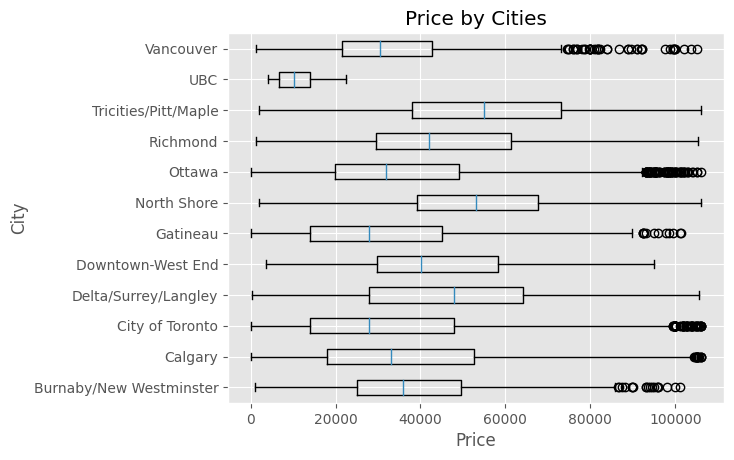

In [52]:
data=df.groupby(by='city')['price']

fig, ax=plt.subplots()

data_to_plot=[data.get_group(city) for city in data.groups]

ax.boxplot(data_to_plot, vert=False)

ytick_positions = range(1, len(data.groups) + 1)
ytick_labels = data.groups.keys()

plt.yticks(ytick_positions, ytick_labels)
plt.ylabel('City')
plt.xlabel('Price')
plt.title('Price by Cities')

plt.show()

### Price & Sale By

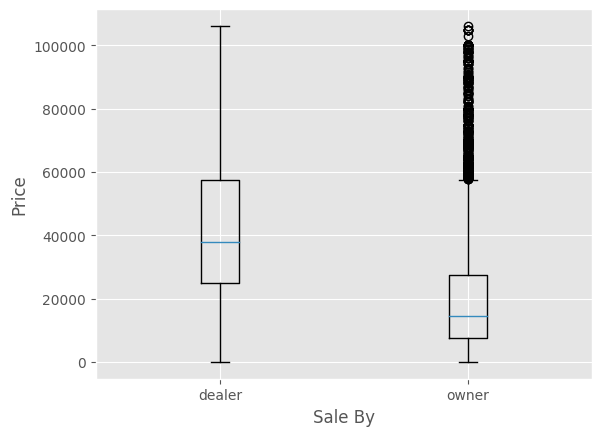

In [53]:
data=df.groupby(by='sale_by')['price']

data_to_plot=[data.get_group(saleby) for saleby in data.groups]

fig, ax=plt.subplots()

ax.boxplot(data_to_plot)

plt.xticks(range(1, len(data.groups)+1), data.groups.keys())
plt.xlabel('Sale By')
plt.ylabel('Price')

plt.show()

### Price & Make

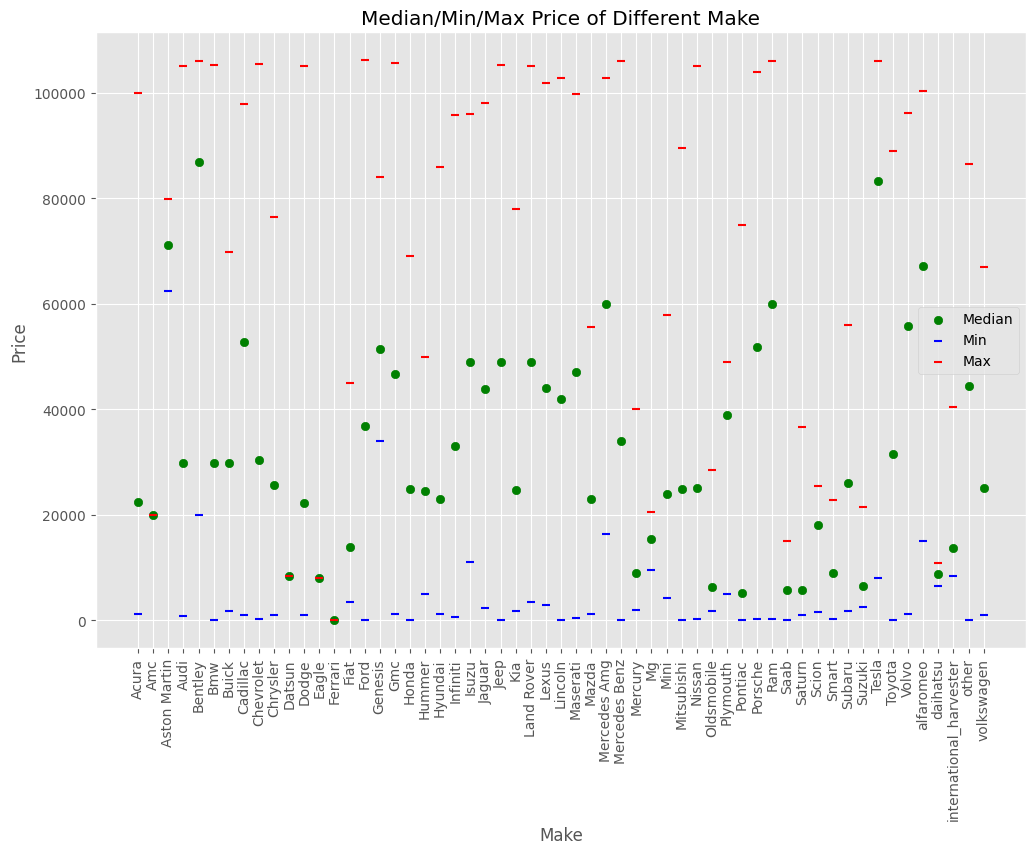

In [54]:
data1=df.groupby(by='make')['price'].median()
data2=df.groupby(by='make')['price'].min()
data3=df.groupby(by='make')['price'].max()

fig, ax=plt.subplots(figsize=(12,8))

ax.scatter(data1.index, data1.values, label='Median', color='green')
ax.scatter(data2.index, data2.values, label='Min', marker='_', color='blue')
ax.scatter(data3.index, data3.values, label='Max', marker='_', color='red')

plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Make')
plt.title('Median/Min/Max Price of Different Make')
plt.legend()

plt.show()

### Price & Fuel Type

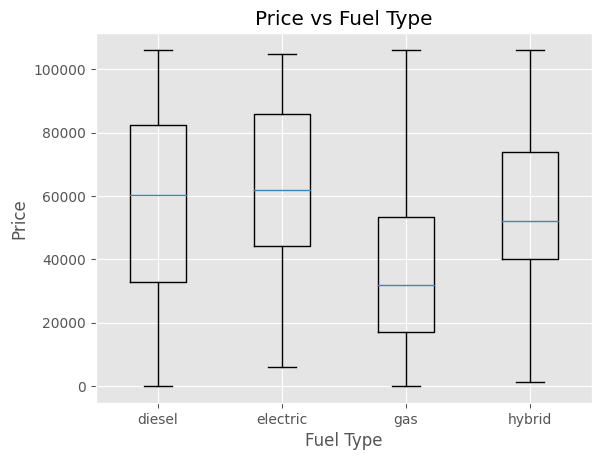

In [55]:
data=df[df['fuel_type']!='other']
data=data.groupby('fuel_type')['price']

data_to_plot=[data.get_group(fuel) for fuel in data.groups]

fig, ax=plt.subplots()

ax.boxplot(data_to_plot)

plt.xticks(range(1, len(data)+1), data.groups.keys())
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price vs Fuel Type')

plt.show()

### Price & Kilometers, No of Visit and Car Age

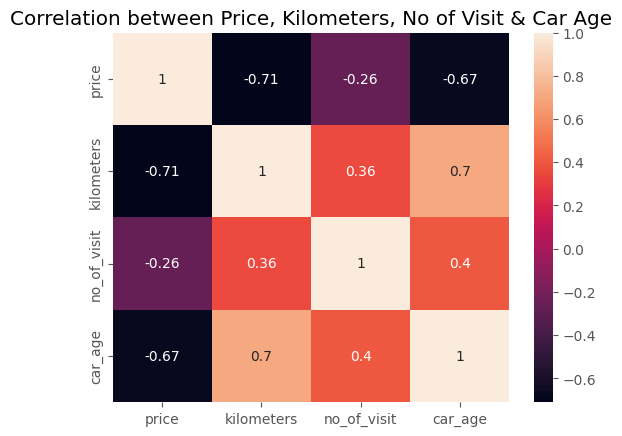

In [56]:
# Visualize the correlation with heatmap
df_corr=df[['price','kilometers','no_of_visit', 'car_age']].dropna().corr()
sns.heatmap(df_corr, annot=True)

plt.title('Correlation between Price, Kilometers, No of Visit & Car Age')

plt.show()

The heatmap shows that price is negatively correlated with kilometer used and the number of visit with different level.<br>
While people seem to visit ads of high-kilometer-used car.

# Model

In [57]:
# import common libraries
from sklearn.model_selection import train_test_split, GridSearchCV # to search best parameters
from sklearn.preprocessing import StandardScaler # for standardize column
from sklearn.preprocessing import MinMaxScaler # for standardize column
from sklearn.metrics import mean_squared_error

## Data selection and encoding categorical data

In [58]:
data=df[[# 'AdID',
     'city',
     'price',
     'sale_by',
     'make',
     'model',
     'trim',
     'condition',
     'kilometers',
     'body',
     'drive_train',
     'fuel_type',
     'color',
    #  'date_posted',
     'no_of_visit',
     'no_of_door',
     'no_of_seats',
     'transmission',
     'push_button_start',
     'parking_assist',
     'sunroof',
     'alloy_wheels',
     'car_age']]

## Categorical data encoding

In [59]:
# One hot encode for sale_by column
saleby_code = pd.get_dummies(data['sale_by'])
data=pd.concat([data, saleby_code], axis=1)
data=data.drop('sale_by', axis=1)

In [60]:
# Replace 'other' to -1
col_with_other=[['no_of_door','no_of_seats']]
for col in col_with_other:
  data[col]=data[col].replace(r'^other[s]?$', -1, regex=True)

In [61]:
# Target encoding
cat_list=['city', 'make', 'model', 'trim', 'condition',
          'body', 'drive_train', 'fuel_type', 'color']

In [94]:
def target_encode(data,cat_list,target, test_size = 0.3, random_state=169):
  ''' To target encode categorical data using the target
      require MinMaxScaler
      Input: data as dataframe,
             cat_list as the list of column need to encode,
             target as the target column
      Output: encoded train, test data,
              list of dictionary with encode information
  '''
  scaler = MinMaxScaler()
  data[target+'_std']=scaler.fit_transform(data[[target]])

  train,test=train_test_split(data, test_size = test_size, random_state=random_state)
  encoded_cat=[]

  # Target encoding
  for cat in cat_list:
    cat_code=train.groupby(cat)[target+'_std'].mean()
    train[cat+'_code']=train[cat].map(cat_code)
    test[cat+'_code']=test[cat].map(cat_code)

    # drop original categorical column
    train=train.drop(cat,axis=1)
    test=test.drop(cat,axis=1)

    # save encoding
    encoded_cat.append(cat_code.to_dict())

  return train, test, encoded_cat

In [95]:
train, test, cat_code=target_encode(data, cat_list, 'price')

In [64]:
train=train.dropna(axis=0, how='any')
train.head()

,price,kilometers,no_of_visit,no_of_door,no_of_seats,transmission,push_button_start,parking_assist,sunroof,alloy_wheels,car_age,dealer,owner,price_std,city_code,make_code,model_code,trim_code,condition_code,body_code,drive_train_code,fuel_type_code,color_code
6510,59995,13,3.0,4,6,2.0,1.0,1.0,1.0,1.0,1,1,0,0.565139,0.528917,0.398826,0.376965,0.328263,0.595077,0.367157,0.358259,0.341664,0.345558
18665,7499,180000,290.0,4,-1,2.0,0.0,0.0,0.0,0.0,14,1,0,0.070631,0.336089,0.237319,0.157194,0.328263,0.288563,0.226523,0.358259,0.341664,0.382255
2023,36995,75000,19.0,4,6,2.0,1.0,1.0,0.0,0.0,4,1,0,0.348481,0.528917,0.373520,0.376965,0.287273,0.288563,0.367157,0.358259,0.341664,0.388011
15544,32999,71415,5.0,-1,-1,2.0,0.0,0.0,0.0,0.0,4,1,0,0.310839,0.312223,0.334349,0.217537,0.436616,0.288563,0.367157,0.358259,0.341664,0.331611
32898,32500,97754,90.0,4,5,2.0,0.0,0.0,1.0,0.0,6,1,0,0.306138,0.349528,0.306794,0.312668,0.328263,0.288563,0.367157,0.358259,0.325803,0.331611


In [65]:
test=test.dropna(axis=0, how='any')
test.head()

,price,kilometers,no_of_visit,no_of_door,no_of_seats,transmission,push_button_start,parking_assist,sunroof,alloy_wheels,car_age,dealer,owner,price_std,city_code,make_code,model_code,trim_code,condition_code,body_code,drive_train_code,fuel_type_code,color_code
8846,6000,235000,430.0,2,3,2.0,0.0,0.0,0.0,0.0,11,0,1,0.056510,0.312223,0.334349,0.365437,0.328263,0.288563,0.484242,0.304597,0.341664,0.388011
38608,83320,23,7.0,4,5,2.0,1.0,1.0,0.0,0.0,1,1,0,0.784858,0.349528,0.547746,0.531269,0.430751,0.595077,0.484242,0.442013,0.341664,0.345558
30604,9000,164657,83.0,-1,-1,2.0,0.0,0.0,0.0,0.0,9,1,0,0.084770,0.349528,0.241915,0.270983,0.229387,0.288563,0.367157,0.391121,0.325803,0.345558
27334,5500,203860,123.0,-1,-1,2.0,0.0,0.0,0.0,0.0,13,1,0,0.051800,0.349528,0.334349,0.356305,0.306639,0.288563,0.367157,0.391121,0.325803,0.382255
38516,58985,3550,6.0,4,5,2.0,0.0,0.0,1.0,1.0,1,1,0,0.555625,0.349528,0.306794,0.376965,0.328263,0.288563,0.367157,0.358259,0.533670,0.331611


In [66]:
cat_code

[city
 Burnaby/New Westminster    0.366524
 Calgary                    0.349528
 City of Toronto            0.312223
 Delta/Surrey/Langley       0.444162
 Downtown-West End          0.399646
 Gatineau                   0.295840
 North Shore                0.504002
 Ottawa                     0.336089
 Richmond                   0.437280
 Tricities/Pitt/Maple       0.528917
 UBC                        0.110910
 Vancouver                  0.317859
 Name: price_std, dtype: float64,
 make
 Acura            0.230636
 Aston Martin     0.670665
 Audi             0.306448
 Bentley          0.607729
 Bmw              0.314296
 Buick            0.307181
 Cadillac         0.446560
 Chevrolet        0.334349
 Chrysler         0.292633
 Dodge            0.275578
 Fiat             0.151940
 Ford             0.373520
 Genesis          0.540658
 Gmc              0.455475
 Honda            0.227682
 Hummer           0.221831
 Hyundai          0.225766
 Infiniti         0.315464
 Isuzu            0.5103

In [67]:
X_train=train.drop(['price', 'price_std'], axis=1)
y_train=train['price']
X_test=test.drop(['price', 'price_std'], axis=1)
y_test=test['price']

## Convert data type

In [68]:
X_test.dtypes

kilometers             int64
no_of_visit          float64
no_of_door            object
no_of_seats           object
transmission         float64
push_button_start    float64
parking_assist       float64
sunroof              float64
alloy_wheels         float64
car_age                int64
dealer                 uint8
owner                  uint8
city_code            float64
make_code            float64
model_code           float64
trim_code            float64
condition_code       float64
body_code            float64
drive_train_code     float64
fuel_type_code       float64
color_code           float64
dtype: object

In [69]:
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = X_train[column].astype(int)

In [70]:
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        X_test[column] = X_test[column].astype(int)

In [71]:
# initialize empty dict for comparison
mse={}

## Regression Tree

In [72]:
# import specific library
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt=DecisionTreeRegressor()

param_grid = {
    'max_depth': [10, 20, 30, 40], # tree depth
    'min_samples_split': [5, 10, 15], # min sample to split
    'min_samples_leaf': [4, 8, 12, 18] # min sample to make a leaf node
}

# grid search to find best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the grid search result
best_dt=grid_search.best_estimator_
best_dt_params=grid_search.best_params_

y_pred=best_dt.predict(X_test)

mse['dt']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549}


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Create a KNN classifier
knn = KNeighborsClassifier()

param_grid={'n_neighbors':np.arange(2,11,2).tolist()}

grid_search=GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_knn=grid_search.best_estimator_
best_knn_para=grid_search.best_params_

y_pred=best_knn.predict(X_test)

mse['knn']=mean_squared_error(y_test,y_pred)
print(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'dt': 70892787.54473549, 'knn': 345126719.55351126}


## Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes (continuous data)
from sklearn.naive_bayes import MultinomialNB  # For Multinomial Naive Bayes (multiclass)
from sklearn.naive_bayes import BernoulliNB  # For Bernoulli Naive Bayes (yes/no)

In [77]:
nb=GaussianNB()

nb.fit(X_train, y_train)

y_pred=nb.predict(X_test)

mse['nb']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646}


## Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)

mse['reg']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646, 'reg': 118913479.16544838}


## Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

In [81]:
lreg = Lasso(random_state=169)

param_grid={'alpha':np.arange(.1,1.1,.1).tolist()}

grid_search=GridSearchCV(lreg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_lreg=grid_search.best_estimator_
best_lreg_para=grid_search.best_params_

y_pred=best_lreg.predict(X_test)

mse['lreg']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646, 'reg': 118913479.16544838, 'lreg': 118912237.34282625}


## Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

In [83]:
rreg=Ridge(random_state=169)

param_grid={'alpha':np.arange(.1,1.1,.1).tolist()}

grid_search=GridSearchCV(rreg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rreg=grid_search.best_estimator_
best_rreg_para=grid_search.best_params_

y_pred=best_rreg.predict(X_test)

mse['rreg']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646, 'reg': 118913479.16544838, 'lreg': 118912237.34282625, 'rreg': 118911887.20739545}


## Neural Network

In [84]:
# tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [85]:
X_train.shape

(27029, 21)

In [86]:
nn_model=Sequential()

nn_model.add(Dense(32, activation='relu', input_shape=(21,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='adam', loss='mean_squared_error')

nn_model.fit(X_train.values, y_train.values, epochs=50, batch_size=32, verbose=0)

y_pred=nn_model.predict(X_test)

mse['nn']=mean_squared_error(y_test, y_pred)
print(mse)

362/362 [==============================] - 0s 801us/step
{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646, 'reg': 118913479.16544838, 'lreg': 118912237.34282625, 'rreg': 118911887.20739545, 'nn': 168269873.70576364}


## SVM

In [87]:
from sklearn.svm import SVR

In [88]:
svm=SVR(kernel='rbf')

svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)

mse['svm']=mean_squared_error(y_test, y_pred)
print(mse)

{'dt': 70892787.54473549, 'knn': 345126719.55351126, 'nb': 370304277.6273646, 'reg': 118913479.16544838, 'lreg': 118912237.34282625, 'rreg': 118911887.20739545, 'nn': 168269873.70576364, 'svm': 434501810.37004715}


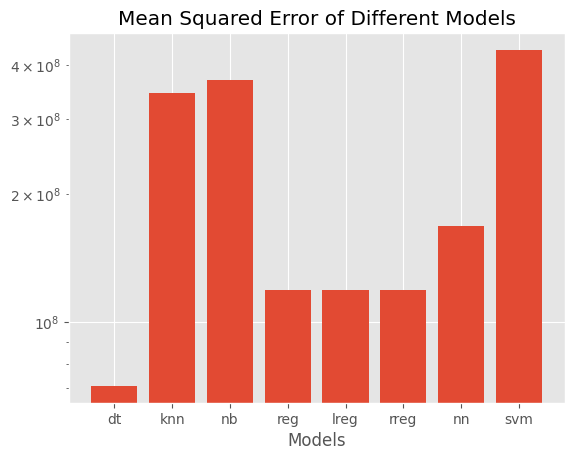

In [89]:
fig, ax=plt.subplots()

ax.bar(list(mse.keys()), list(mse.values()))

plt.yscale('log')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Models')

plt.show()

It looks like regression tree gives the best result

## Prediction

In [106]:
for item in cat_code:
  print(item.keys())

dict_keys(['Burnaby/New Westminster', 'Calgary', 'City of Toronto', 'Delta/Surrey/Langley', 'Downtown-West End', 'Gatineau', 'North Shore', 'Ottawa', 'Richmond', 'Tricities/Pitt/Maple', 'UBC', 'Vancouver'])
dict_keys(['Acura', 'Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Fiat', 'Ford', 'Genesis', 'Gmc', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes Amg', 'Mercedes Benz', 'Mercury', 'Mg', 'Mini', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volvo', 'alfaromeo', 'daihatsu', 'other', 'volkswagen'])
dict_keys(['1500', '200-series', '2500', '3', '3-series', '300-series', '3500', '4-series', '4runner', '5-series', '7-series', '911', 'a3', 'a4', 'a5', 'acadia', 'accent', 'accord', 'altima', 'atlas', 'bolt', 'bronco', 'c-class', 'camaro', '

In [226]:
target=['Tricities/Pitt/Maple', 'Infiniti', 'other', 'Other', 'used', 'suv_crossover', 'awd', 'gas', 'black']

i=0
target_code=[]

for feature_dict in cat_code:
  for key in feature_dict.keys():
    if key==target[i] and i<len(target):
      target_code.append(feature_dict[target[i]])
  i=i+1

In [227]:
X_train.columns

Index(['kilometers', 'no_of_visit', 'no_of_door', 'no_of_seats',
       'transmission', 'push_button_start', 'parking_assist', 'sunroof',
       'alloy_wheels', 'car_age', 'dealer', 'owner', 'city_code', 'make_code',
       'model_code', 'trim_code', 'condition_code', 'body_code',
       'drive_train_code', 'fuel_type_code', 'color_code'],
      dtype='object')

In [228]:
pred=np.array([1000, 100, 1, 2, 2, 0, 0, 0, 0, 10, 0, 1]+target_code).reshape(1,-1)

In [229]:
prediction=best_dt.predict(pred)[0]
print(f'The predicted price is ${prediction}')

The predicted price is $31079.935483870966


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
